## ***SI 311 Homework #11: Identifying Trends with Spread Covers in WIdely Favored CBK Games***

Data from: https://www.sportsbookreviewsonline.com/scoresoddsarchives/ncaabasketball/ncaabasketballoddsarchives.htm

Formulas from SI 311, University of Michigan Fall '22

*Code Written by Brandon Huggard*

https://www.linkedin.com/in/brandon-huggard-5957a0192/

In [496]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [497]:
df = pd.read_csv('all.csv')
df['id']=np.divmod(np.arange(len(df)),2)[0]+1
# df = df.set_index('id')

In [498]:
df.head(5)

,Year,Date,Rot,VH,Team,1st,2nd,Final,Open,Close,ML,2H,id
0,07-08,1105,503,N,Maine,23.0,19.0,42.0,127,127.5,200,65.5,1
1,07-08,1105,504,N,Richmond,23.0,21.0,44.0,8.5,5.5,-240,3.5,1
2,07-08,1105,505,V,TennMartin,36.0,35.0,71.0,140,144,13000,75,2
3,07-08,1105,506,H,MemphisU,49.0,53.0,102.0,35,35.5,-39000,16,2
4,07-08,1106,721,N,GardnerWebb,34.0,35.0,69.0,4,3,-160,71.5,3


In [499]:
df.head(6)
df = df.drop(columns =['Rot', 'Date', '1st', '2nd', '2H', 'Open'])

In [500]:
pd.set_option('display.max_columns', None)
df.head(8)

,Year,VH,Team,Final,Close,ML,id
0,07-08,N,Maine,42.0,127.5,200,1
1,07-08,N,Richmond,44.0,5.5,-240,1
2,07-08,V,TennMartin,71.0,144,13000,2
3,07-08,H,MemphisU,102.0,35.5,-39000,2
4,07-08,N,GardnerWebb,69.0,3,-160,3
5,07-08,N,AlabamaA&M,55.0,139.5,140,3
6,07-08,V,CentralArkansas,40.0,134,3000,4
7,07-08,H,Kentucky,67.0,26.5,-7000,4


In [501]:
df['s'] =df.groupby(['id', 'Year']).cumcount()+1
df=df.set_index(['s','id', 'Year']).unstack(0)
df.columns=[f"{x}{y}" for x,y in df.columns]
df=df.reset_index()


In [502]:
df.head(30)

,id,Year,VH1,VH2,Team1,Team2,Final1,Final2,Close1,Close2,ML1,ML2
0,1,07-08,N,N,Maine,Richmond,42.0,44.0,127.5,5.5,200,-240
1,2,07-08,V,H,TennMartin,MemphisU,71.0,102.0,144,35.5,13000,-39000
2,3,07-08,N,N,GardnerWebb,AlabamaA&M,69.0,55.0,3,139.5,-160,140
3,4,07-08,V,H,CentralArkansas,Kentucky,40.0,67.0,134,26.5,3000,-7000
4,5,07-08,N,N,Maine,TennMartin,62.0,66.0,128,1.5,105,-125
5,6,07-08,V,H,Richmond,MemphisU,63.0,80.0,140.5,29.5,4000,-10000
6,7,07-08,N,N,OhioValley,Buffalo,82.0,89.0,166,25,3000,-7000
7,8,07-08,V,H,MorganState,Connecticut,65.0,69.0,138.5,26,NL,NL
8,9,07-08,N,N,AlabamaA&M,CentralArkansas,59.0,69.0,129,3.5,140,-160
9,10,07-08,V,H,GardnerWebb,Kentucky,84.0,68.0,132.5,26.5,3000,-7000


In [503]:
df = df.rename(columns={"VH1": 'Away Team', "VH2": "Home Team", 'Team1': 'Visitor', "Team2": 'Home', '1st1': 'T1_1st', '1st2': "T2_1st",
                   '2nd1': 'T1_2nd', '2nd2': "T2_2nd", 'Final1': 'Visitor Final', 'Final2': "Home Final", 'Open1': 'Visitor_Open',
                       'Open2': 'Home_Open', 'Close1': 'Visitor_Close','Close2': 'Home_Close', 'ML1': 'Visitor ML', 'ML2': 'Home ML'})

In [504]:
mich = df.drop(df[(df['Visitor'] != 'Michigan') & (df['Home'] != 'Michigan')].index)
mich

,id,Year,Away Team,Home Team,Visitor,Home,Visitor Final,Home Final,Visitor_Close,Home_Close,Visitor ML,Home ML
82,83,07-08,V,H,Brown,Michigan,57.0,72.0,122,14.5,850,-1300
174,175,07-08,V,H,Michigan,Georgetown,52.0,74.0,124,13,650,-900
342,343,07-08,N,N,Michigan,Butler,65.0,79.0,117.5,6.5,245,-285
385,386,07-08,N,N,E.Washington,Michigan,53.0,61.0,129,16.5,1590,-2150
445,446,07-08,N,N,Michigan,WesternKy,69.0,73.0,140.5,2,115,-135
...,...,...,...,...,...,...,...,...,...,...,...,...
62820,62821,22-23,N,N,EasternMichigan,Michigan,83.0,88.0,146,17.5,1200,-3000
63040,63041,22-23,V,H,Michigan,Pittsburgh,91.0,60.0,8.5,139,-380,320
63086,63087,22-23,N,N,Michigan,ArizonaState,62.0,87.0,7.5,142,-330,270
63240,63241,22-23,V,H,Ohio,Michigan,66.0,70.0,146.5,15,850,-1500


In [505]:
mich.head(30)

,id,Year,Away Team,Home Team,Visitor,Home,Visitor Final,Home Final,Visitor_Close,Home_Close,Visitor ML,Home ML
82,83,07-08,V,H,Brown,Michigan,57.0,72.0,122,14.5,850,-1300
174,175,07-08,V,H,Michigan,Georgetown,52.0,74.0,124,13,650,-900
342,343,07-08,N,N,Michigan,Butler,65.0,79.0,117.5,6.5,245,-285
385,386,07-08,N,N,E.Washington,Michigan,53.0,61.0,129,16.5,1590,-2150
445,446,07-08,N,N,Michigan,WesternKy,69.0,73.0,140.5,2,115,-135
511,512,07-08,V,H,BostonCollege,Michigan,77.0,64.0,129,4,160,-190
577,578,07-08,V,H,Michigan,Harvard,51.0,62.0,6,144.5,-250,210
724,725,07-08,V,H,Michigan,Duke,67.0,95.0,141.5,24,4500,-9000
818,819,07-08,V,H,CentralMichigan,Michigan,78.0,66.0,139.5,8,345,-415
960,961,07-08,V,H,UCLA,Michigan,69.0,54.0,12.5,133.5,-800,600


In [506]:
mich = mich.drop(columns =['Away Team', 'Home Team'])

In [507]:
mich

,id,Year,Visitor,Home,Visitor Final,Home Final,Visitor_Close,Home_Close,Visitor ML,Home ML
82,83,07-08,Brown,Michigan,57.0,72.0,122,14.5,850,-1300
174,175,07-08,Michigan,Georgetown,52.0,74.0,124,13,650,-900
342,343,07-08,Michigan,Butler,65.0,79.0,117.5,6.5,245,-285
385,386,07-08,E.Washington,Michigan,53.0,61.0,129,16.5,1590,-2150
445,446,07-08,Michigan,WesternKy,69.0,73.0,140.5,2,115,-135
...,...,...,...,...,...,...,...,...,...,...
62820,62821,22-23,EasternMichigan,Michigan,83.0,88.0,146,17.5,1200,-3000
63040,63041,22-23,Michigan,Pittsburgh,91.0,60.0,8.5,139,-380,320
63086,63087,22-23,Michigan,ArizonaState,62.0,87.0,7.5,142,-330,270
63240,63241,22-23,Ohio,Michigan,66.0,70.0,146.5,15,850,-1500


In [508]:
mich.head(3)

,id,Year,Visitor,Home,Visitor Final,Home Final,Visitor_Close,Home_Close,Visitor ML,Home ML
82,83,07-08,Brown,Michigan,57.0,72.0,122,14.5,850,-1300
174,175,07-08,Michigan,Georgetown,52.0,74.0,124,13,650,-900
342,343,07-08,Michigan,Butler,65.0,79.0,117.5,6.5,245,-285


In [509]:
mich.dtypes

id                 int64
Year              object
Visitor           object
Home              object
Visitor Final    float64
Home Final       float64
Visitor_Close     object
Home_Close        object
Visitor ML        object
Home ML           object
dtype: object

In [510]:
cols = ['Visitor_Close', 'Home_Close', 'Visitor ML', 'Home ML']
mich[cols] = mich[cols].apply(pd.to_numeric, errors='coerce', axis=1)

In [511]:
mich['Winning_Team'] = np.where(mich['Home Final'] > mich['Visitor Final'], 1, 0)
#1 means home wins, 0 means visitor wins

In [512]:
mich['Favored_Team'] = np.where(mich['Home ML'] < 0, 1, 0)
mich
#1 means home is favored, 0 means visitor is favored

,id,Year,Visitor,Home,Visitor Final,Home Final,Visitor_Close,Home_Close,Visitor ML,Home ML,Winning_Team,Favored_Team
82,83,07-08,Brown,Michigan,57.0,72.0,122.0,14.5,850.0,-1300.0,1,1
174,175,07-08,Michigan,Georgetown,52.0,74.0,124.0,13.0,650.0,-900.0,1,1
342,343,07-08,Michigan,Butler,65.0,79.0,117.5,6.5,245.0,-285.0,1,1
385,386,07-08,E.Washington,Michigan,53.0,61.0,129.0,16.5,1590.0,-2150.0,1,1
445,446,07-08,Michigan,WesternKy,69.0,73.0,140.5,2.0,115.0,-135.0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
62820,62821,22-23,EasternMichigan,Michigan,83.0,88.0,146.0,17.5,1200.0,-3000.0,1,1
63040,63041,22-23,Michigan,Pittsburgh,91.0,60.0,8.5,139.0,-380.0,320.0,0,0
63086,63087,22-23,Michigan,ArizonaState,62.0,87.0,7.5,142.0,-330.0,270.0,1,0
63240,63241,22-23,Ohio,Michigan,66.0,70.0,146.5,15.0,850.0,-1500.0,1,1


In [513]:
mich = mich.drop(mich[(mich['Winning_Team'] != mich['Favored_Team'])].index)
#removes upsets to find only potential instances of a winning team letting off the gas versus letting a game slip

In [514]:
mich = mich.drop(mich[(mich['Visitor ML'] >= 0) & (mich['Home ML'] >= 0.0)].index)
#removes weird ML lines

In [515]:
mich['Visitor_Close'].mask(mich['Visitor_Close']>= 55,inplace=True)

In [516]:
mich['Home_Close'].mask(mich['Home_Close']>= 55,inplace=True)

In [517]:
mich['spread'] = mich['Home_Close'].fillna(mich['Visitor_Close'])

In [518]:
mich

,id,Year,Visitor,Home,Visitor Final,Home Final,Visitor_Close,Home_Close,Visitor ML,Home ML,Winning_Team,Favored_Team,spread
82,83,07-08,Brown,Michigan,57.0,72.0,NaN,14.5,850.0,-1300.0,1,1,14.5
174,175,07-08,Michigan,Georgetown,52.0,74.0,NaN,13.0,650.0,-900.0,1,1,13.0
342,343,07-08,Michigan,Butler,65.0,79.0,NaN,6.5,245.0,-285.0,1,1,6.5
385,386,07-08,E.Washington,Michigan,53.0,61.0,NaN,16.5,1590.0,-2150.0,1,1,16.5
445,446,07-08,Michigan,WesternKy,69.0,73.0,NaN,2.0,115.0,-135.0,1,1,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
62608,62609,22-23,IPFW,Michigan,56.0,75.0,NaN,16.0,1000.0,-2000.0,1,1,16.0
62820,62821,22-23,EasternMichigan,Michigan,83.0,88.0,NaN,17.5,1200.0,-3000.0,1,1,17.5
63040,63041,22-23,Michigan,Pittsburgh,91.0,60.0,8.5,NaN,-380.0,320.0,0,0,8.5
63240,63241,22-23,Ohio,Michigan,66.0,70.0,NaN,15.0,850.0,-1500.0,1,1,15.0


In [519]:
mich = mich.drop(mich[(mich['spread'] < 0)].index)

In [520]:
mich = mich.drop(['Visitor_Close', 'Home_Close'], axis=1)

In [521]:
mich.spread.value_counts()

5.0     17
9.0     16
4.0     15
7.0     15
4.5     15
2.0     15
5.5     15
3.0     15
7.5     13
8.0     12
1.5     12
2.5     11
6.5     10
11.0     9
8.5      9
6.0      9
10.0     8
10.5     8
9.5      8
13.0     7
12.0     7
14.0     7
3.5      6
16.0     6
15.0     5
13.5     5
1.0      5
16.5     5
12.5     4
11.5     4
15.5     4
24.0     3
26.0     3
21.5     3
17.5     3
24.5     3
22.0     3
18.5     2
33.5     2
22.5     2
23.0     2
25.0     2
21.0     2
19.0     2
26.5     2
17.0     2
37.0     1
27.0     1
31.0     1
30.0     1
20.0     1
18.0     1
32.5     1
19.5     1
32.0     1
29.5     1
14.5     1
Name: spread, dtype: int64

In [522]:
mich.head(1)

,id,Year,Visitor,Home,Visitor Final,Home Final,Visitor ML,Home ML,Winning_Team,Favored_Team,spread
82,83,07-08,Brown,Michigan,57.0,72.0,850.0,-1300.0,1,1,14.5


In [523]:
mich['pt_diff'] = abs(mich['Visitor Final'] - mich['Home Final'])

In [524]:
mich.head(1)

,id,Year,Visitor,Home,Visitor Final,Home Final,Visitor ML,Home ML,Winning_Team,Favored_Team,spread,pt_diff
82,83,07-08,Brown,Michigan,57.0,72.0,850.0,-1300.0,1,1,14.5,15.0


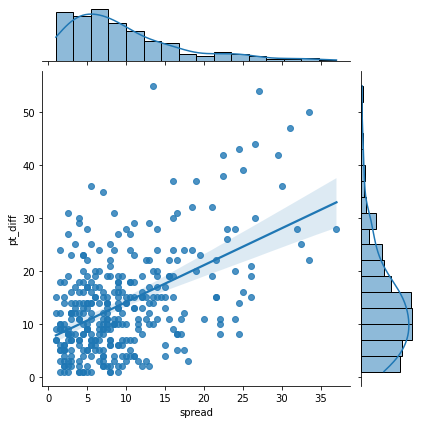

In [557]:
sns.jointplot(data=mich, x='spread', y='pt_diff', kind='reg')

# Potential point shaving cases are towards the bottom right!

In [543]:
big_spread = mich.loc[(mich['spread'] >= 12)]

In [544]:
shave = mich.loc[(mich['spread'] >= 12) & (mich['pt_diff'] < 12)]
#returns all games with potential point shaving as described by Wolfers

In [546]:
shave.shape

(25, 12)

In [547]:
big_spread.shape

(97, 12)

In [565]:
pot_shave_pct = len(shave)/len(big_spread) * 100
pot_shave_pct

25.773195876288657

In [599]:
normal_spreads = mich.loc[(mich['spread'] >= 1.5) & (mich['spread'] < 12)]

In [600]:
normal_spreads.shape

(242, 12)

In [601]:
reg = mich.loc[(mich['spread'] >= 1.5) & (mich['spread'] < 12) & (mich['pt_diff'] < mich['spread'])]
reg.shape

(56, 12)

In [602]:
reg_miss_pct = len(reg)/len(normal_spreads) * 100
reg_miss_pct

23.140495867768596

In [607]:
shave.sort_values(by = 'spread', ascending = False)

,id,Year,Visitor,Home,Visitor Final,Home Final,Visitor ML,Home ML,Winning_Team,Favored_Team,spread,pt_diff
43800,43801,18-19,WesternMichigan,Michigan,62.0,70.0,4000.0,-10000.0,1,1,24.5,8.0
32339,32340,15-16,Rutgers,Michigan,57.0,68.0,5000.0,-12500.0,1,1,24.0,11.0
63454,63455,22-23,Jackson State,Michigan,68.0,78.0,1800.0,-8000.0,1,1,22.0,10.0
57909,57910,21-22,TarletonSt,Michigan,54.0,65.0,1400.0,-4000.0,1,1,22.0,11.0
21168,21169,12-13,PennState,Michigan,71.0,79.0,5505.0,-14505.0,1,1,22.0,8.0
7902,7903,09-10,Michigan,Kansas,64.0,75.0,1500.0,-3000.0,1,1,20.0,11.0
1741,1742,07-08,Michigan,Wisconsin,61.0,64.0,1500.0,-2600.0,1,1,18.0,3.0
62820,62821,22-23,EasternMichigan,Michigan,83.0,88.0,1200.0,-3000.0,1,1,17.5,5.0
5745,5746,08-09,Michigan,Connecticut,61.0,69.0,1350.0,-2300.0,1,1,17.0,8.0
43624,43625,18-19,SouthCarolina,Michigan,78.0,89.0,1057.0,-1985.0,1,1,17.0,11.0


In [608]:
mich.shape

(349, 12)